<a href="https://colab.research.google.com/github/AISA-DucHaba/AI-Solution-Architect/blob/main/aisa_llama_customization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌻 Welcome to the LLM for Nurse Burnout app (Part 2![Screenshot 2024-05-21 at 3.01.29 PM.png](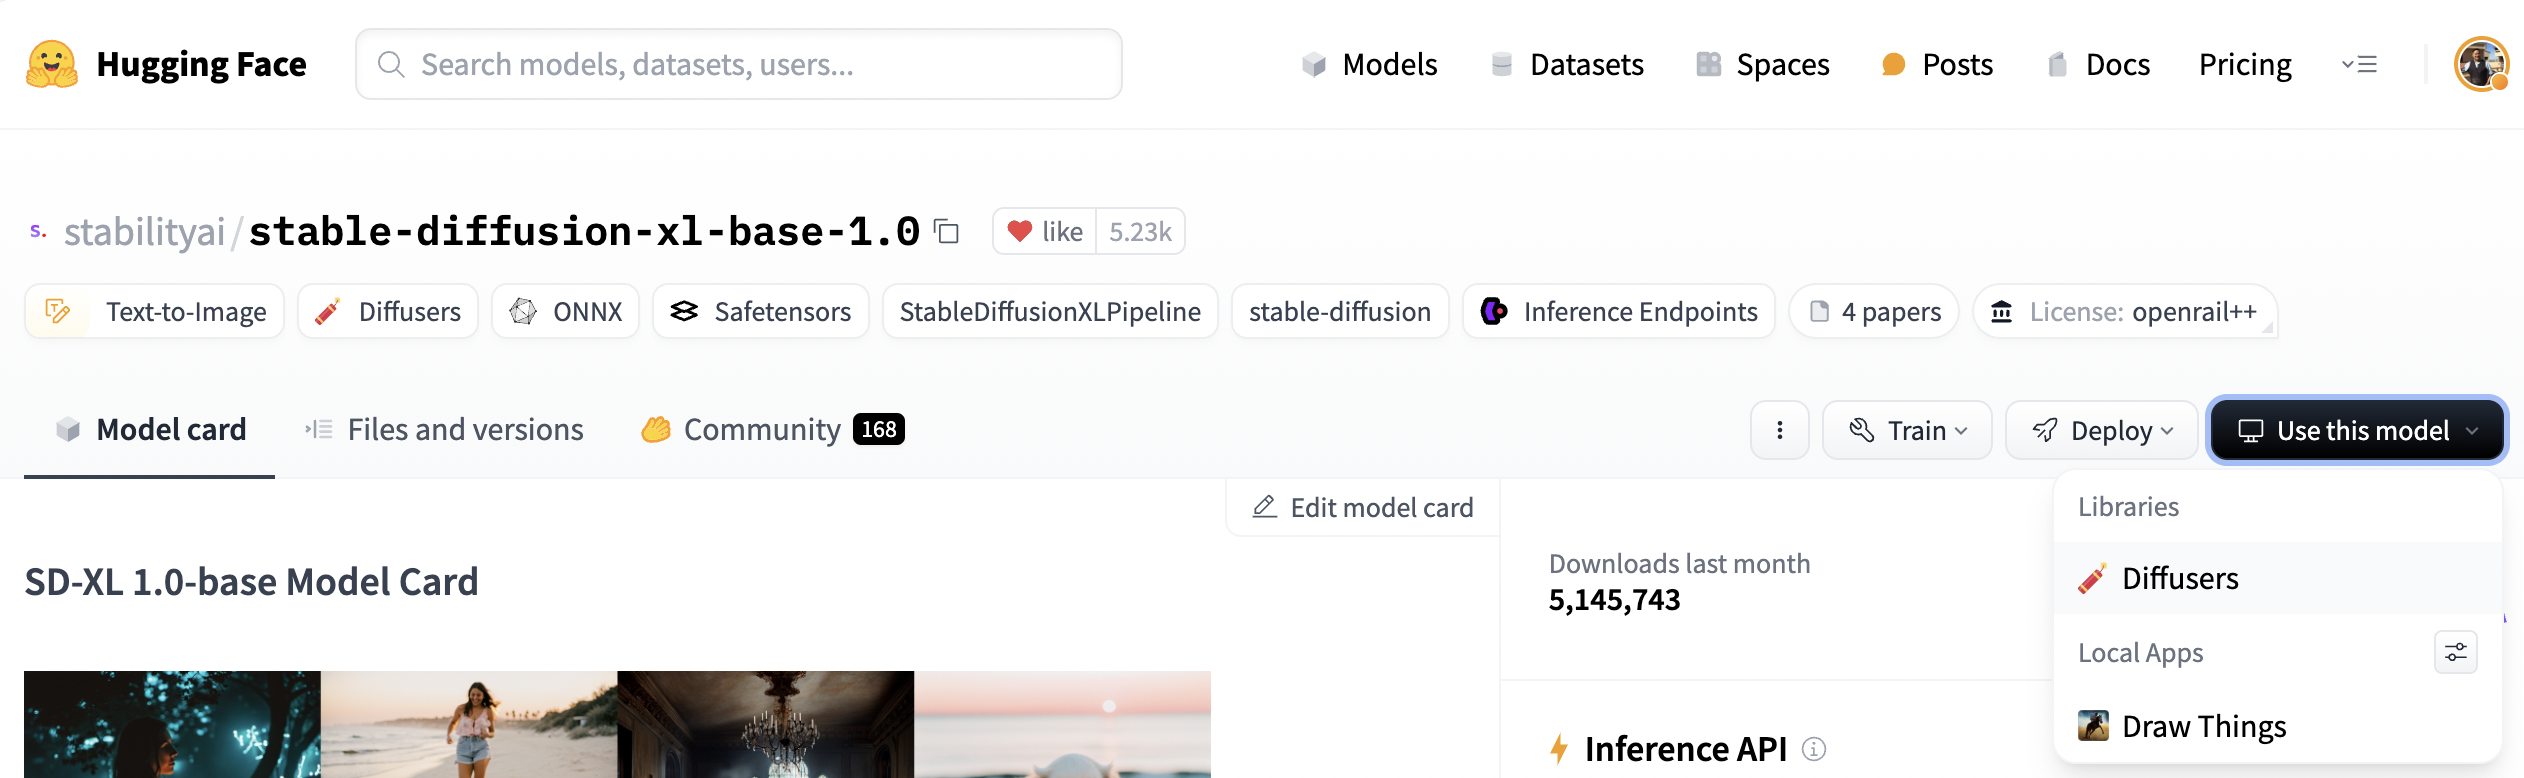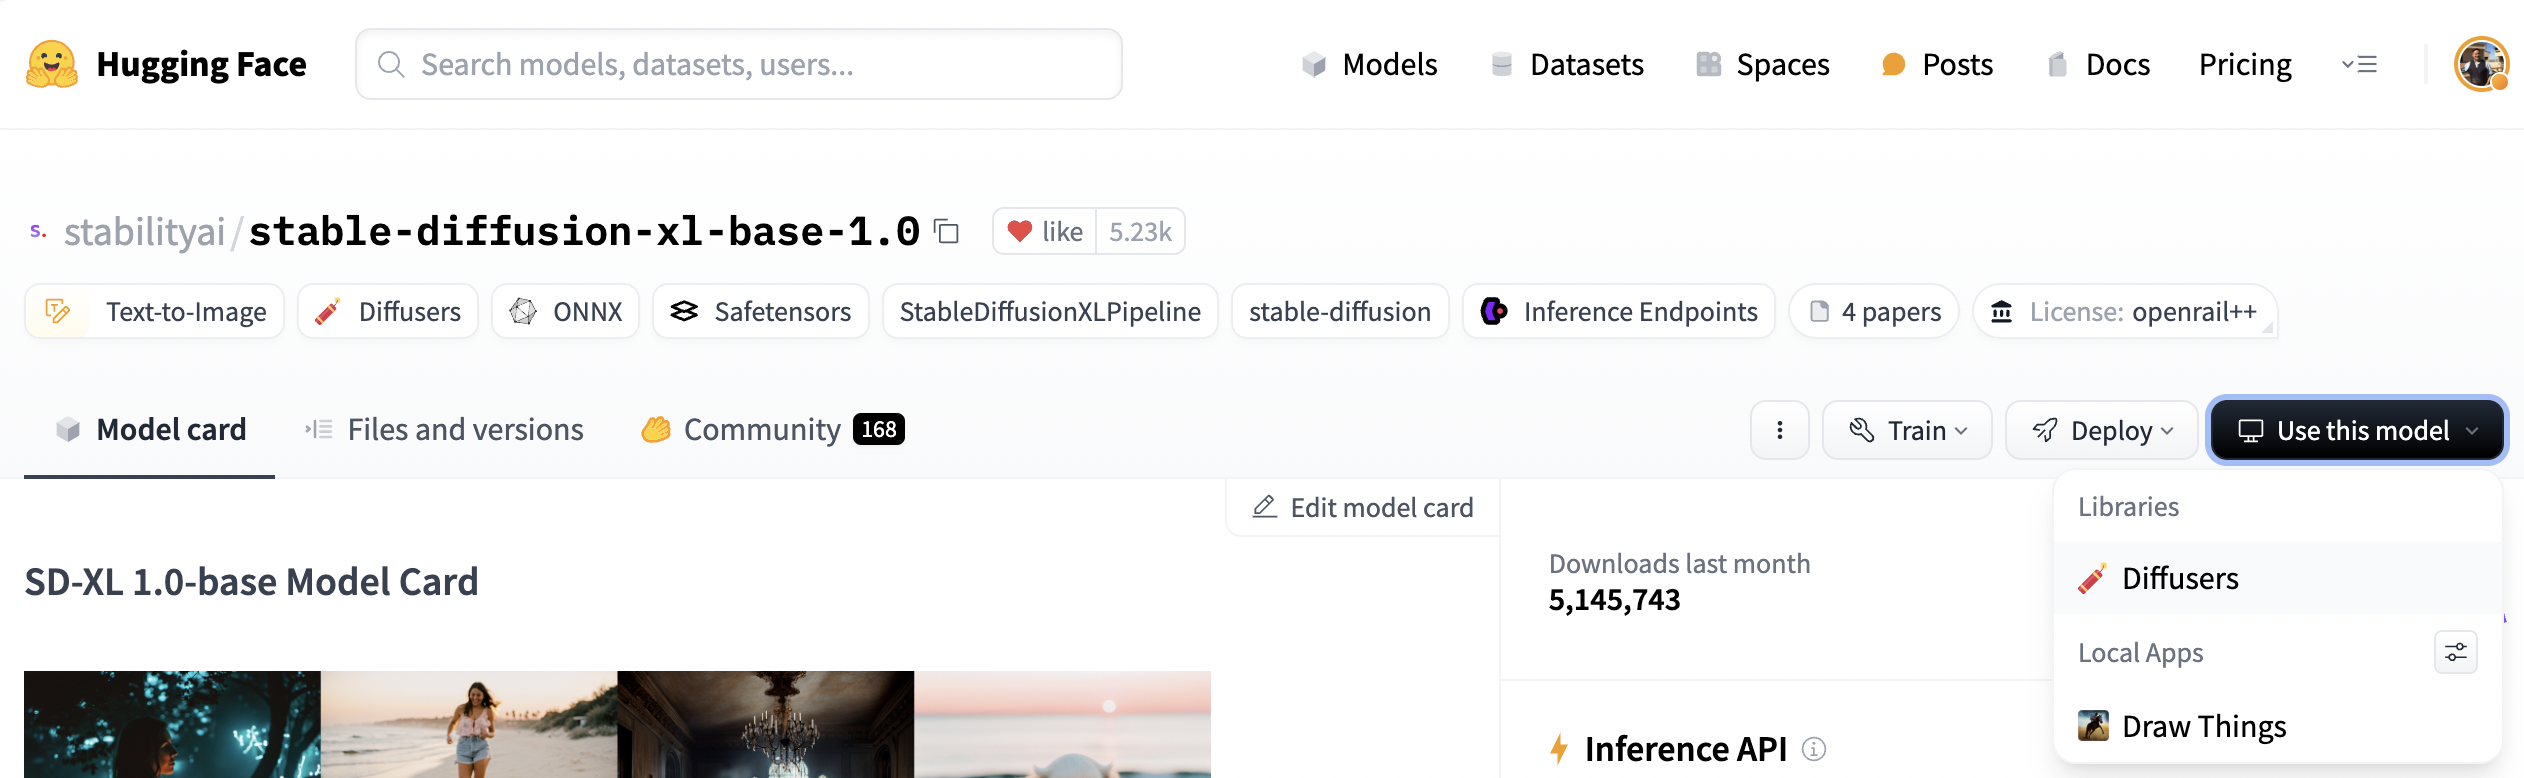) of 2)

- This notebook walks through testing an LLM using the primary prompt templates used in llama-index.

# 🐣 The Goal
---

- **Requirement Statement:** Nurse burnout is a serious problem that impacts the well-being of healthcare staff and the quality of care they provide patients. To address this issue, we develop a machine-learning application to monitor burnout signs among nurses.

- The apps analyze data related to work hours, patient loads, and stress indicators to provide insights that can help identify and support nurses who are at risk.

# 🤖 Step Outline:

1. Deep dive to see how Llama Index work using its tutorial as as base.

2. Parse one record

3. Parse all records

4. Smoke test it.

# 👑 Note:

**NOTE:** ✋ Variable naming convention

1. **text_**: is the begining for all raw text or md content.

2. **llm_**: is the begining for all GenAI engine.

1. **doc_**: is the begining for all LlamaIndex "document" type.

1. **template_**: is the begining for all prompt template used in LlamaIndex.

1. **index_**: is the begining for all LlamaIndex "index" token type.

1. **qeng_**: is the begining of the query engine.

2. **df_**: is the begining of pandas dataframe.



## 🙈 Legal:

- This Python Jupyter Notebook is for sharing with **Friends** in the AISA course by ELVTR.

- If you are **NOT** my friend, and I see you. In the best spirit of the **science community**, you may read this Notebook, but be aware that I see you.

- Copyrights 2023: [GNU GENERAL PUBLIC LICENSE 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html#license-text)

# 🛺 Set up steps

In [ ]:
%pip install llama-index-llms-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.4 MB/s eta 0:00:00


- Documentation on Llama-Index is at:

  - main doc site: https://docs.llamaindex.ai/en/stable/
  
  - Plugin: https://llamahub.ai
  - video series: https://www.youtube.com/playlist?list=PLTZkGHtR085ZjK1srrSZIrkeEzQiMjO9W

In [ ]:
!pip install openai
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 34.4 MB/s eta 0:00:00


In [ ]:
import openai
import os

openai.api_key = "YOUR_KEY"
os.environ["YOUR_KEY"] = openai.api_key
%env OPENAI_API_KEY={openai.api_key}

- Smoke Test

In [ ]:
# from llama_index.llms.openai import OpenAI

# resp = OpenAI().complete("Paul Graham is ")
import llama_index
import llama_index.llms
import llama_index.llms.openai

p = 'Neil Armstrong is'
resp = llama_index.llms.openai.OpenAI().complete(p)
print(f'Prompt: {p}\nResponse: {resp}')

Prompt: Neil Armstrong is
Response:  best known as the first person to walk on the moon during the Apollo 11 mission in 1969. He was an American astronaut and engineer who made history with his famous words, "That's one small step for man, one giant leap for mankind." Armstrong's achievement marked a significant milestone in space exploration and solidified his place in history as a pioneer of human spaceflight.


# 👾 LlamaIndex tutorial

In this section, we load a test document, create an LLM, and copy prompts from llama-index to test with.

In [ ]:
# grap all the docs from Public repo

!git clone https://github.com/run-llama/llama_docs_bot.git

Cloning into 'llama_docs_bot'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 223 (delta 18), reused 214 (delta 13), pack-reused 0
Receiving objects: 100% (223/223), 7.76 MiB | 13.05 MiB/s, done.
Resolving deltas: 100% (18/18), done.


First, let's load a quick document to test with. Right now, we will just load it as plain text, but we can do other operations later!

In [ ]:
fname = "/content/llama_docs_bot/docs/getting_started/starter_example.md"
with open(fname, "r") as f:
  text_starter = f.read()

In [ ]:
# prompt: pretty print md file text_starter on python notebook

import IPython
# from IPython.display import Markdown
IPython.display.Markdown(text_starter)


# Starter Tutorial

```{tip}
Make sure you've followed the [installation](installation.md) steps first.
```
Here is a starter example for using LlamaIndex. 

### Download

LlamaIndex examples can be found in the `examples` folder of the LlamaIndex repository.
We first want to download this `examples` folder. An easy way to do this is to just clone the repo:

```bash
$ git clone https://github.com/jerryjliu/llama_index.git
```

Next, navigate to your newly-cloned repository, and verify the contents:

```bash
$ cd llama_index
$ ls
LICENSE                data_requirements.txt  tests/
MANIFEST.in            examples/              pyproject.toml
Makefile               experimental/          requirements.txt
README.md              llama_index/             setup.py
```

We now want to navigate to the following folder:

```bash
$ cd examples/paul_graham_essay
```

This contains LlamaIndex examples around Paul Graham's essay, ["What I Worked On"](http://paulgraham.com/worked.html). A comprehensive set of examples are already provided in `TestEssay.ipynb`. For the purposes of this tutorial, we can focus on a simple example of getting LlamaIndex up and running.

### Build and Query Index

Create a new `.py` file with the following:

```python
from llama_index import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents)
```

This builds an index over the documents in the `data` folder (which in this case just consists of the essay text). We then run the following

```python
query_engine = index.as_query_engine()
response = query_engine.query("What did the author do growing up?")
print(response)
```

You should get back a response similar to the following: `The author wrote short stories and tried to program on an IBM 1401.`

### Viewing Queries and Events Using Logging

In a Jupyter notebook, you can view info and/or debugging logging using the following snippet:

```python
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))
```

You can set the level to `DEBUG` for verbose output, or use `level=logging.INFO` for less.

### Saving and Loading

By default, data is stored in-memory.
To persist to disk (under `./storage`):

```python
index.storage_context.persist()
```

To reload from disk:
```python
from llama_index import StorageContext, load_index_from_storage

# rebuild storage context
storage_context = StorageContext.from_defaults(persist_dir="./storage")
# load index
index = load_index_from_storage(storage_context)
```



```{admonition} Next Steps
* learn more about the [high-level concepts](/getting_started/concepts.md).
* tell me how to [customize things](/getting_started/customization.rst).
* curious about a specific module? check out the guides 👈
* have a use case in mind? check out the [end-to-end tutorials](/end_to_end_tutorials/use_cases.md)
```



Next, we create our LLM!

- Note the temperature set to zero instead of the default 0.3 because I want NO imagination (just the fact please)

- ✋ use full.path.lib.name not shortcut
  - (**GOOD**) import llama_index
    - use: llama_index.llms.ChatMessage()
  - (**BAD**) from llama_index.llms import ChatMessage
    - don't use: ChatMessage()
    - because we will forget which lib does ChatMessage() belong to.

In [ ]:
!git clone https://github.com/jerryjliu/llama_index.git

Cloning into 'llama_index'...
remote: Enumerating objects: 82521, done.
remote: Counting objects: 100% (5678/5678), done.
remote: Compressing objects: 100% (742/742), done.
remote: Total 82521 (delta 5217), reused 5063 (delta 4891), pack-reused 76843
Receiving objects: 100% (82521/82521), 172.80 MiB | 14.49 MiB/s, done.
Resolving deltas: 100% (56799/56799), done.
Updating files: 100% (10128/10128), done.


## View Uber and Lyft data

In [ ]:
# # prompt: display the pdf file /content/llama_index/docs/examples/data/10k/uber_2021.pdf

# fname = 'llama_index/docs/examples/data/10k/uber_2021.pdf'
# from IPython.display import IFrame
# IFrame(fname, width=800, height=600)

## Create the custom engine on Uber and Lift 10K Financial reports

In [ ]:
#from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
import llama_index.core

fname = '/content/llama_index/llama-datasets/10k'
documents = llama_index.core.SimpleDirectoryReader(fname).load_data()
index = llama_index.core.VectorStoreIndex.from_documents(documents)
query_engine = index.as_query_engine()

In [ ]:
# This builds an index over the documents in the data folder (which in this case just consists of the essay text). We then run the following

p = "What Uber market risk?"
resp = query_engine.query(p)
print(f'Prompt: {p}\nResponse: {resp}')

Prompt: What Uber market risk?
Response: Uber is exposed to market risks related to insurance coverage, liability claims, and regulatory requirements. These risks include potential liabilities from accidents, injuries, or incidents involving drivers using the platform, the adequacy of insurance reserves, the impact of local laws and regulations on insurance coverage, and potential litigation or regulatory inquiries regarding pricing models and surge pricing practices.


In [ ]:
fname = '/content/aisa/data'
documents_aisa = llama_index.core.SimpleDirectoryReader(fname).load_data()
index_aisa = llama_index.core.VectorStoreIndex.from_documents(documents_aisa)
query_engine_aisa = index_aisa.as_query_engine()

In [ ]:
# smoke test
p = "Write an LLM project for digital financial advisor including, schedule, LLM model recomendation, and fairness and bias plan."
resp = query_engine_aisa.query(p)
print(f'Prompt: {p}\nResponse: {resp}')

In [ ]:
p = "What Uber market risk?"
resp = query_engine.query(p)
print(f'Prompt: {p}\nResponse: {resp}')

In [ ]:
# from llama_index.llms import OpenAI
llm_gpt = llama_index.llms.OpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=1000)

- Note: temperature is set to zero not default 0.3 or 0.7 to incourage creativity. Zero is strick control, i.e. (almost) same answer everytime.

In [ ]:
# test it out
mesg1 = [
  llama_index.llms.ChatMessage(role="system", content="Talk like a pirate in reponse."),
  llama_index.llms.ChatMessage(role="user", content="Tell me a joke."),
]
resp = llm_gpt.chat(mesg1)
print(resp.message)


assistant: Arr, matey, ye be wantin' a joke, eh? Well, here ye go:

Why did the pirate go to school?

Because he wanted to improve his "arrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr

LlamaIndex uses some simple templates under the hood for answering queries -- mainly a `template_text_qa` for obtaining initial answers, and a `template_refine` for refining an existing answer when all the text does not fit into one LLM call.

Let's copy the default templates, and test out our LLM with a few questions.

In [ ]:
from llama_index import Prompt

template_text_qa = Prompt(
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the question: {query_str}\n"
)

template_refine = Prompt(
    "We have the opportunity to refine the original answer "
    "(only if needed) with some more context below.\n"
    "------------\n"
    "{context_msg}\n"
    "------------\n"
    "Given the new context, refine the original answer to better "
    "answer the question: {query_str}. "
    "If the context isn't useful, output the original answer again.\n"
    "Original Answer: {existing_answer}"
)

Now, lets test a few questions!

## Text QA Template Testing

In [ ]:
question = "How can I install llama-index?"
prompt = template_text_qa.format(context_str=text_starter, query_str=question)
response = llm_gpt.complete(prompt)
print(response.text)

To install LlamaIndex, you need to follow the installation steps provided in the "installation.md" file.


In [ ]:
question = "How do I create an index?"
prompt = template_text_qa.format(context_str=text_starter, query_str=question)
response = llm_gpt.complete(prompt)
print(response.text)

To create an index using LlamaIndex, you need to follow these steps:

1. Download the LlamaIndex repository by cloning it from GitHub.
2. Navigate to the `examples/paul_graham_essay` folder in the cloned repository.
3. Create a new Python file and import the necessary modules: `VectorStoreIndex` and `SimpleDirectoryReader`.
4. Load the documents from the `data` folder using `SimpleDirectoryReader('data').load_data()`.
5. Build the index using `VectorStoreIndex.from_documents(documents)`.
6. To query the index, create a query engine using `index.as_query_engine()`.
7. Use the query engine to perform a query by calling `query_engine.query("Your query here")`.
8. The response will contain the result of the query.

Note: The code snippets provided are in Python.


- How about negative path?

In [ ]:
question = "Who is the first man on the moon? and give me the confidence level to your response."
prompt = template_text_qa.format(context_str=text_starter, query_str=question)
response = llm_gpt.complete(prompt)
print(response.text)

Based on the given context information, it is not possible to determine who the first man on the moon is. The context information is about using LlamaIndex and does not provide any information about the first man on the moon. Therefore, the confidence level for this response is low.


- Good answer to the above negative path.

- Using stream_complete() method
  - The delta() print only the latest/newest response.

In [ ]:
question = "How do I create an index? Write your answer using only code."
prompt = template_text_qa.format(context_str=text_starter, query_str=question)
response_gen = llm_gpt.stream_complete(prompt)
for response in response_gen:
    print(response.delta, end="")

```python
from llama_index import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents)
```

- Same answer from .complete() method.

In [ ]:
# try it normal
question = "How do I create an index? Write your answer using only code."
prompt = template_text_qa.format(context_str=text_starter, query_str=question)
response = llm_gpt.complete(prompt)
print(response.text)

```python
from llama_index import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents)
```


In [ ]:
# # prompt: explain the function stream_complete() in a professional and conversational style.

# def stream_complete(self, prompt, *, max_tokens=None, stop_token=None, early_stopping=False, **kwargs):
#   """
#   Continuously generate text until a stop token is reached.

#   This method is useful for generating large amounts of text, such as
#   transcripts or code. It works by repeatedly calling the `complete()` method
#   with the previous generated text as the context.

#   Args:
#     prompt: The initial prompt to start the generation with.
#     max_tokens: The maximum number of tokens to generate.
#     stop_token: The token to stop generation at. If `None`, generation will
#       continue until `max_tokens` is reached.
#     early_stopping: If `True`, generation will stop as soon as the stop token
#       is reached. Otherwise, generation will continue until `max_tokens` is
#       reached.
#     **kwargs: Additional arguments to pass to the `complete()` method.

#   Returns:
#     A `Generator` that yields the generated text.
#   """

#   if max_tokens is None:
#     max_tokens = self.max_tokens

#   if stop_token is None:
#     stop_token = self.stop_token

#   context = prompt
#   while True:
#     response = self.complete(context, max_tokens=max_tokens, **kwargs)
#     text = response.text
#     if stop_token in text:
#       if early_stopping:
#         break
#     yield text
#     context = text


- Let's see some doc under the hood

In [ ]:
help(llm_gpt.stream_complete)


Help on method wrapped_llm_predict in module llama_index.llms.base:

wrapped_llm_predict(*args: Any, **kwargs: Any) -> Any method of llama_index.llms.openai.OpenAI instance



In [ ]:
# prompt: print all parameters of function stream_complete

print(llm_gpt.stream_complete.__code__.co_varnames)


('_self', 'args', 'kwargs', 'wrapped_gen')


## Refine Template Testing

In [ ]:
question = "How do I create an index? Write your answer using only code."
existing_answer = """To create an index using LlamaIndex, you need to follow these steps:

1. Download the LlamaIndex repository by cloning it from GitHub.
2. Navigate to the `examples/paul_graham_essay` folder in the cloned repository.
3. Create a new Python file and import the necessary modules: `VectorStoreIndex` and `SimpleDirectoryReader`.
4. Load the documents from the `data` folder using `SimpleDirectoryReader('data').load_data()`.
5. Build the index using `VectorStoreIndex.from_documents(documents)`.
6. To persist the index to disk, use `index.storage_context.persist()`.
7. To reload the index from disk, use the `StorageContext` and `load_index_from_storage` functions.

Note: This answer assumes that you have already installed LlamaIndex and have the necessary dependencies."""
prompt = template_refine.format(context_msg=text_starter, query_str=question, existing_answer=existing_answer)
response = llm_gpt.complete(prompt)
print(response.text)

To create an index using LlamaIndex, follow these steps:

1. Download the LlamaIndex repository by cloning it from GitHub.
2. Navigate to the `examples/paul_graham_essay` folder in the cloned repository.
3. Create a new Python file and import the necessary modules: `VectorStoreIndex` and `SimpleDirectoryReader`.
4. Load the documents from the `data` folder using `SimpleDirectoryReader('data').load_data()`.
5. Build the index using `VectorStoreIndex.from_documents(documents)`.

```python
from llama_index import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents)
```

6. To persist the index to disk, use `index.storage_context.persist()`.

```python
index.storage_context.persist()
```

7. To reload the index from disk, use the `StorageContext` and `load_index_from_storage` functions.

```python
from llama_index import StorageContext, load_index_from_storage

storage_context = StorageContext.from

### Chat Example

- The LLM also has a `chat` method that takes in a list of messages, to simulate a chat session.

- same as above

In [ ]:
from llama_index.llms import ChatMessage

chat_history = [
    ChatMessage(role="system", content="You are a helpful QA chatbot that can answer questions about llama-index."),
    ChatMessage(role="user", content="How do I create an index?"),
]

response = llm_gpt.chat(chat_history)
print(response.message)

assistant: To create an index, you can follow these general steps:

1. Determine the purpose and scope of your index: Decide what information you want to include in your index and what it will be used for. This will help you define the scope and structure of your index.

2. Identify the items to be indexed: Determine the specific items or topics that you want to include in your index. For example, if you are creating an index for a book, you might want to index chapters, sections, and important concepts.

3. Create a list of index terms: Compile a list of terms or keywords that represent the items you identified in the previous step. These terms should be concise and specific to help users find the information they need.

4. Organize the index terms: Group the index terms into logical categories or sections. This will help users navigate the index more easily and find relevant information faster.

5. Assign page numbers or locations: For each index term, determine the page number or lo

# Conclusion Chaper 1

In this notebook, we covered the low-level LLM API, and tested out some basic prompts with out documentation data.

# 🌻 The Document and Nodes

## LlamaIndex Bottoms-Up Development - Documents and Nodes
In order to answer questions about the LlamaIndex docs, we first need to load them!

A majority of our documentation is in markdown format. For the sake of scope, we will ONLY worry about markdown files for now.

When parsing these files, there are a few things we might want to keep track of

- Current header (and header hierarchy!)
- Code blocks
- Text
- Source file names

While LlamaIndex does have a built-in markdown loader, we can write our own to fit our requirements exactly! Loaders are not magic -- they just read files and create documents. So building our own is easy!

We have provided an implementation of a custom markdown loaded in the source code. Let's test it out to see how it works!

Additioinal doc:

- **Documents**: are representation of entire data source.

- **Nodes**: are chunks of document mades smaller enough to work well for retrieval and LLM.

- **Metadata** is extra information descriping a node.
  - for example: category, file name, source, date, etc
  - They can be use for embeddings and/or LLM.

- **Relationship** are links to other nodes and documents.
  - For example: Nodes has a relationship to their source document

In [ ]:
import os
import sys
# sys.path.append(os.path.join(os.getcwd(), '..'))

In [ ]:
# try it out
doc_llm_starter = llama_index.Document(text=text_starter)

In [ ]:
print(f'Type of llm doc: {type(doc_llm_starter)}')

Type of llm doc: <class 'llama_index.schema.Document'>


In [ ]:
# inspect it
doc_llm_starter

Document(id_='9da6ef14-49c2-4437-9023-7642117485c5', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='1778e308c0d390f90b1c54ecf33124f44bb53889f9e2284bab8cd856f18bef87', text='# Starter Tutorial\n\n```{tip}\nMake sure you\'ve followed the [installation](installation.md) steps first.\n```\nHere is a starter example for using LlamaIndex. \n\n### Download\n\nLlamaIndex examples can be found in the `examples` folder of the LlamaIndex repository.\nWe first want to download this `examples` folder. An easy way to do this is to just clone the repo:\n\n```bash\n$ git clone https://github.com/jerryjliu/llama_index.git\n```\n\nNext, navigate to your newly-cloned repository, and verify the contents:\n\n```bash\n$ cd llama_index\n$ ls\nLICENSE                data_requirements.txt  tests/\nMANIFEST.in            examples/              pyproject.toml\nMakefile               experimental/          requirements.txt\nREADME.md           

## Inspect doc info

In [ ]:
# manual cause my ai just not getting it

def print_llmi_doc_info(llmi_doc):
  print(f'Relationships data: {llmi_doc.relationships}\n------------\n')
  print(f'Meta data: {llmi_doc.metadata}\n------------\n')
  print(f'Exclude Meta data: {llmi_doc.excluded_llm_metadata_keys}\n------------\n')
  print(f'Exclude Embed Meta data: {llmi_doc.excluded_embed_metadata_keys}\n------------\n')
  print(f'Embedding: {llmi_doc.embedding}\n------------\n')
  print(f'Text: {llmi_doc.text}')
  return


In [ ]:
# llm_starter_doc.get_content(metadata_node=llama_index.MetadataMode.ALL)


In [ ]:
print_llmi_doc_info(doc_llm_starter)


Relationships data: {}
------------

Meta data: {}
------------

Exclude Meta data: []
------------

Exclude Embed Meta data: []
------------

Embedding: None
------------

Text: # Starter Tutorial

```{tip}
Make sure you've followed the [installation](installation.md) steps first.
```
Here is a starter example for using LlamaIndex. 

### Download

LlamaIndex examples can be found in the `examples` folder of the LlamaIndex repository.
We first want to download this `examples` folder. An easy way to do this is to just clone the repo:

```bash
$ git clone https://github.com/jerryjliu/llama_index.git
```

Next, navigate to your newly-cloned repository, and verify the contents:

```bash
$ cd llama_index
$ ls
LICENSE                data_requirements.txt  tests/
MANIFEST.in            examples/              pyproject.toml
Makefile               experimental/          requirements.txt
README.md              llama_index/             setup.py
```

We now want to navigate to the following folder

## add in meta data

- It is a dictionary type

In [ ]:
meta1 = {'filename': '/content/llama_docs_bot/docs/getting_started/starter_example.md',
  'type': 'text',
  'title': 'Lesson 1, LlamaIndex The LLM',
  'source':'LlamaIndex documentation website',
  'category':'install',
  'date':'October 30,2022',
  'tags':'install, beginner',
  'author': 'Carmen Sandiego'}
doc_llm_starter.metadata= meta1

In [ ]:
print_llmi_doc_info(doc_llm_starter)

Relationships data: {}
------------

Meta data: {'filename': '/content/llama_docs_bot/docs/getting_started/starter_example.md', 'type': 'text', 'title': 'Lesson 1, LlamaIndex The LLM', 'source': 'LlamaIndex documentation website', 'category': 'install', 'date': 'October 30,2022', 'tags': 'install, beginner', 'author': 'Carmen Sandiego'}
------------

Exclude Meta data: []
------------

Exclude Embed Meta data: []
------------

Embedding: None
------------

Text: # Starter Tutorial

```{tip}
Make sure you've followed the [installation](installation.md) steps first.
```
Here is a starter example for using LlamaIndex. 

### Download

LlamaIndex examples can be found in the `examples` folder of the LlamaIndex repository.
We first want to download this `examples` folder. An easy way to do this is to just clone the repo:

```bash
$ git clone https://github.com/jerryjliu/llama_index.git
```

Next, navigate to your newly-cloned repository, and verify the contents:

```bash
$ cd llama_index
$ l

## Read all doc




In [ ]:
# below failed because missing sentencepiece and transfomer
!pip install sentencepiece
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.2 MB/s eta 0:00:00


In [ ]:
# try out using directory reader
fname = "/content/llama_docs_bot/docs"
doc_all_llm = llama_index.SimpleDirectoryReader(fname,recursive=True).load_data()


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


### dig deeper on load doc

In [ ]:
help(llama_index.SimpleDirectoryReader)

Help on class SimpleDirectoryReader in module llama_index.readers.file.base:

class SimpleDirectoryReader(llama_index.readers.base.BaseReader)
 |  SimpleDirectoryReader(input_dir: Optional[str] = None, input_files: Optional[List] = None, exclude: Optional[List] = None, exclude_hidden: bool = True, errors: str = 'ignore', recursive: bool = False, encoding: str = 'utf-8', filename_as_id: bool = False, required_exts: Optional[List[str]] = None, file_extractor: Optional[Dict[str, llama_index.readers.base.BaseReader]] = None, num_files_limit: Optional[int] = None, file_metadata: Optional[Callable[[str], Dict]] = None) -> None
 |  
 |  Simple directory reader.
 |  
 |  Load files from file directory.
 |  Automatically select the best file reader given file extensions.
 |  
 |  Args:
 |      input_dir (str): Path to the directory.
 |      input_files (List): List of file paths to read
 |          (Optional; overrides input_dir, exclude)
 |      exclude (List): glob of python file paths to exc

In [ ]:
import pathlib

# prompt
def fetch_file_details(path_string: str) -> tuple:
    """
    Extracts the filename, file type (extension), and parent node from the provided path string.

    Parameters:
    - path_string (str): The string representation of the file path.

    Returns:
    - tuple: A tuple containing filename (without extension), file type (extension), and parent node.

    Example:
    >>> get_file_details("/home/user/documents/myfile.txt")
    ('myfile', '.txt', 'documents')
    """

    # Convert the string to a Path object
    path_obj = pathlib.Path(path_string)

    # Extract the filename without the extension
    filename = path_obj.stem

    # Extract the file type (extension)
    file_type = path_obj.suffix

    # Extract the parent node (direct parent directory)
    parent_node = path_obj.parent.name

    return filename, file_type, parent_node


In [ ]:
# test it
fetch_file_details('/content/llama_docs_bot/docs/getting_started/starter_example.md')

('starter_example', '.md', 'getting_started')

In [ ]:
# hand code because I don't know what do I want yet
def fetch_meta(x):
  print(x)
  a, b, c = fetch_file_details(x)
  meta = {'filename':x, 'title':a, 'file_type':b, 'parent_node':c}
  return meta

In [ ]:
# try out using directory reader
fname = "/content/llama_docs_bot/docs/getting_started"
doc_llm_sub1 = llama_index.SimpleDirectoryReader(fname,
  recursive=True, file_metadata=fetch_meta).load_data()

/content/llama_docs_bot/docs/getting_started/FAQ.md
/content/llama_docs_bot/docs/getting_started/concepts.md
/content/llama_docs_bot/docs/getting_started/customization.rst
/content/llama_docs_bot/docs/getting_started/installation.md
/content/llama_docs_bot/docs/getting_started/starter_example.md


In [ ]:
print(type(doc_llm_sub1))
print(type(doc_llm_sub1[0]))
print(len(doc_llm_sub1))

<class 'list'>
<class 'llama_index.schema.Document'>
19


In [ ]:
# prompt: write a python function for using print_llmi_doc_info to randomly select one

import random
import llama_index
def print_random_llmi_doc_info(llm_docs):
  random_doc = random.choice(llm_docs)
  print_llmi_doc_info(random_doc)


In [ ]:
# test it
print_random_llmi_doc_info(doc_llm_sub1)

Relationships data: {}
------------

Meta data: {'filename': '/content/llama_docs_bot/docs/getting_started/installation.md', 'title': 'installation', 'file_type': '.md', 'parent_node': 'getting_started'}
------------

Exclude Meta data: ['creation_date', 'last_modified_date', 'last_accessed_date']
------------

Exclude Embed Meta data: ['creation_date', 'last_modified_date', 'last_accessed_date']
------------

Embedding: None
------------

Text: 

Installation from Source
Git clone this repository: `git clone https://github.com/jerryjliu/llama_index.git`. Then do:

- `pip install -e .` if you want to do an editable install (you can modify source files) of just the package itself.
- `pip install -r requirements.txt` if you want to install optional dependencies + dependencies used for development (e.g. unit testing).





In [ ]:
# again
print_random_llmi_doc_info(doc_llm_sub1)

Relationships data: {}
------------

Meta data: {'filename': '/content/llama_docs_bot/docs/getting_started/concepts.md', 'title': 'concepts', 'file_type': '.md', 'parent_node': 'getting_started'}
------------

Exclude Meta data: ['creation_date', 'last_modified_date', 'last_accessed_date']
------------

Exclude Embed Meta data: ['creation_date', 'last_modified_date', 'last_accessed_date']
------------

Embedding: None
------------

Text: 

High-Level Concepts

```{tip}
If you haven't, install and complete starter tutorial before you read this. It will make a lot more sense!
```

LlamaIndex helps you build LLM-powered applications (e.g. Q&A, chatbot, and agents) over custom data.

In this high-level concepts guide, you will learn:
* the retrieval augmented generation (RAG) paradigm for combining LLM with custom data,
* key concepts and modules in LlamaIndex for composing your own RAG pipeline.




## Test it with doc

- do it for the simple "doc_llm_starter" first

In [ ]:
# # REMEMBER not to use short name put long name
# from llama_index import ServiceContext, set_global_service_context
# from llama_index.llms import OpenAI
# from llama_index import VectorStoreIndex, StorageContext, load_index_from_storage

### Get the index and store it

In [ ]:
type(doc_llm_starter)

llama_index.schema.Document

In [ ]:
print(type(doc_llm_sub1))
print(type(doc_llm_sub1[0]))

<class 'list'>
<class 'llama_index.schema.Document'>


In [ ]:
# test it
index_llm_sub1 = llama_index.VectorStoreIndex.from_documents(doc_llm_sub1)

# getting_started_index.storage_context.persist(persist_dir="./getting_started_index")

Note:

- doc_llm_starter is failed to load even if same type but not a list

In [ ]:
li_doc_llm_starter = [doc_llm_starter]
print(type(li_doc_llm_starter), type(li_doc_llm_starter[0]))

<class 'list'> <class 'llama_index.schema.Document'>


In [ ]:
# it works
# It need a list of schema.Document type
index_llm_starter = llama_index.VectorStoreIndex.from_documents(li_doc_llm_starter)

- Store it for later use

In [ ]:
# now store it
index_llm_sub1.storage_context.persist(persist_dir="index_llm_sub1")

In [ ]:
# check it
!ls -la index_llm_sub1

total 784
drwxr-xr-x 2 root root   4096 Oct 31 22:44 .
drwxr-xr-x 1 root root   4096 Oct 31 22:44 ..
-rw-r--r-- 1 root root  49999 Oct 31 22:44 docstore.json
-rw-r--r-- 1 root root     18 Oct 31 22:44 graph_store.json
-rw-r--r-- 1 root root   2011 Oct 31 22:44 index_store.json
-rw-r--r-- 1 root root 732588 Oct 31 22:44 vector_store.json


In [ ]:
# now store it
index_llm_starter.storage_context.persist(persist_dir="index_llm_starter")

In [ ]:
# check it
!ls -la index_llm_starter

total 60
drwxr-xr-x 2 root root  4096 Oct 31 22:46 .
drwxr-xr-x 1 root root  4096 Oct 31 22:46 ..
-rw-r--r-- 1 root root  4247 Oct 31 22:46 docstore.json
-rw-r--r-- 1 root root    18 Oct 31 22:46 graph_store.json
-rw-r--r-- 1 root root   331 Oct 31 22:46 index_store.json
-rw-r--r-- 1 root root 34761 Oct 31 22:46 vector_store.json


In [ ]:
# from llama_index import ServiceContext, set_global_service_context
# from llama_index.llms import OpenAI

# # create a global service context
# service_context = ServiceContext.from_defaults(llm=OpenAI(model="gpt-3.5-turbo", temperature=0))
# set_global_service_context(service_context)

### Do it: Query engine

In [ ]:
# define an llm engine (gpt)
service_context = llama_index.ServiceContext.from_defaults(
  llm=llama_index.llms.OpenAI(model="gpt-3.5-turbo", temperature=0))
llama_index.set_global_service_context(service_context)

In [ ]:
# # create a query engine tool for each folder
# qeng_llm_sub1 = llama_index.tools.QueryEngineTool.from_defaults(
#     query_engine=index_llm_sub1.as_query_engine(),
#     name="sub set of llm doc/md file",
#     description="Useful for answering questions about installing and running llama index, as well as basic explanations of how llama index works."
# )

In [ ]:
help(index_llm_sub1.as_query_engine)

Help on method as_query_engine in module llama_index.indices.base:

as_query_engine(**kwargs: Any) -> llama_index.indices.query.base.BaseQueryEngine method of llama_index.indices.vector_store.base.VectorStoreIndex instance



In [ ]:
qeng_llm_sub1 = index_llm_sub1.as_query_engine()

### QA it : same questions

In [ ]:
# test happy path
question = "How can I install llama-index?"
response = qeng_llm_sub1.query(question)
print(str(response))

You can install llama-index by running the command "pip install llama-index".


In [ ]:
# happy path
question = "How do I create an index?"
response = qeng_llm_sub1.query(question)
print(str(response))

To create an index, you need to follow these steps:

1. Create a new `.py` file.
2. Import the necessary modules, such as `llama_index.VectorStoreIndex` and `llama_index.SimpleDirectoryReader`.
3. Load the documents that you want to index using `SimpleDirectoryReader('data').load_data()`, where `'data'` is the folder containing the documents.
4. Build the index using `VectorStoreIndex.from_documents(documents)`, where `documents` is the loaded data.
5. To use the index for querying, create a query engine using `index.as_query_engine()`.
6. Query the index using `query_engine.query("your query")`, where `"your query"` is the query you want to perform.

By following these steps, you will be able to create an index and perform queries on it.


In [ ]:
# negative path
question = "Who is the first man on the moon? and tell me your confidance score in your response."
response = qeng_llm_sub1.query(question)
print(textwrap.fill(str(response), width=80))

I'm sorry, but I cannot answer the query about the first man on the moon based
on the given context information. My confidence score in this response is 0.


In [ ]:
# happy path
question = "How do I create an index? and show the metadata and the confidence score."
response = qeng_llm_sub1.query(question)
print(textwrap.fill(str(response), width=120))

To create an index, you can follow these steps:  1. Create a new `.py` file. 2. Import the necessary modules, such as
`llama_index.VectorStoreIndex` and `llama_index.SimpleDirectoryReader`. 3. Load the data from the desired folder using
`SimpleDirectoryReader('data').load_data()`. 4. Build the index using `VectorStoreIndex.from_documents(documents)`. 5.
To print the metadata and confidence score, you can use the query engine. First, create a query engine using
`query_engine = index.as_query_engine()`. 6. Then, execute a query by calling `query_engine.query("your_query_here")`.
7. Finally, print the response, which will include the metadata and confidence score.  Please note that the specific
code and steps may vary depending on the programming language and framework you are using.


In [ ]:
print(str(response))

To create an index, you can follow these steps:

1. Create a new `.py` file.
2. Import the necessary modules, such as `llama_index.VectorStoreIndex` and `llama_index.SimpleDirectoryReader`.
3. Load the data from the desired folder using `SimpleDirectoryReader('data').load_data()`.
4. Build the index using `VectorStoreIndex.from_documents(documents)`.
5. To print the metadata and confidence score, you can use the query engine. First, create a query engine using `query_engine = index.as_query_engine()`.
6. Then, execute a query by calling `query_engine.query("your_query_here")`.
7. Finally, print the response, which will include the metadata and confidence score.

Please note that the specific code and steps may vary depending on the programming language and framework you are using.


In [ ]:
print_random_llmi_doc_info(doc_llm_sub1)

Relationships data: {}
------------

Meta data: {'filename': '/content/llama_docs_bot/docs/getting_started/starter_example.md', 'title': 'starter_example', 'file_type': '.md', 'parent_node': 'getting_started'}
------------

Exclude Meta data: ['creation_date', 'last_modified_date', 'last_accessed_date']
------------

Exclude Embed Meta data: ['creation_date', 'last_modified_date', 'last_accessed_date']
------------

Embedding: None
------------

Text: 

load index
index = load_index_from_storage(storage_context)
```



```{admonition} Next Steps
* learn more about the high-level concepts.
* tell me how to customize things.
* curious about a specific module? check out the guides 👈
* have a use case in mind? check out the end-to-end tutorials
```





In [ ]:
type(response)

llama_index.response.schema.Response

In [ ]:
help(response)

Help on Response in module llama_index.response.schema object:

class Response(builtins.object)
 |  Response(response: Optional[str], source_nodes: List[llama_index.schema.NodeWithScore] = <factory>, metadata: Optional[Dict[str, Any]] = None) -> None
 |  
 |  Response object.
 |  
 |  Returned if streaming=False.
 |  
 |  Attributes:
 |      response: The response text.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, response: Optional[str], source_nodes: List[llama_index.schema.NodeWithScore] = <factory>, metadata: Optional[Dict[str, Any]] = None) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self) -> str
 |      Convert to string representation.
 |  
 |  get_formatted_sources(self, length: int = 100) -> str
 |      Get formatted sources text.
 |  
 |  ----------------------------------------------------------------------


In [ ]:
response.__dict__

{'response': 'To create an index, you can follow these steps:\n\n1. Create a new `.py` file.\n2. Import the necessary modules, such as `llama_index.VectorStoreIndex` and `llama_index.SimpleDirectoryReader`.\n3. Load the data from the desired folder using `SimpleDirectoryReader(\'data\').load_data()`.\n4. Build the index using `VectorStoreIndex.from_documents(documents)`.\n5. To print the metadata and confidence score, you can use the query engine. First, create a query engine using `query_engine = index.as_query_engine()`.\n6. Then, execute a query by calling `query_engine.query("your_query_here")`.\n7. Finally, print the response, which will include the metadata and confidence score.\n\nPlease note that the specific code and steps may vary depending on the programming language and framework you are using.',
 'source_nodes': [NodeWithScore(node=TextNode(id_='3e741c5b-6e7b-4324-930f-9bcec73c961b', embedding=None, metadata={'filename': '/content/llama_docs_bot/docs/getting_started/starte

In [ ]:
# prompt: print name, value from dictionary response.__dict__

for name, value in response.__dict__.items():
  print(f'{name}::: {value}')


response::: To create an index, you can follow these steps:

1. Create a new `.py` file.
2. Import the necessary modules, such as `llama_index.VectorStoreIndex` and `llama_index.SimpleDirectoryReader`.
3. Load the data from the desired folder using `SimpleDirectoryReader('data').load_data()`.
4. Build the index using `VectorStoreIndex.from_documents(documents)`.
5. To print the metadata and confidence score, you can use the query engine. First, create a query engine using `query_engine = index.as_query_engine()`.
6. Then, execute a query by calling `query_engine.query("your_query_here")`.
7. Finally, print the response, which will include the metadata and confidence score.

Please note that the specific code and steps may vary depending on the programming language and framework you are using.
source_nodes::: [NodeWithScore(node=TextNode(id_='3e741c5b-6e7b-4324-930f-9bcec73c961b', embedding=None, metadata={'filename': '/content/llama_docs_bot/docs/getting_started/starter_example.md', 't

In [ ]:
for name, value in response.__dict__.items():
  if name == 'metadata':
    for i, j in value.items():
      print(f'{i}: {j}')

3e741c5b-6e7b-4324-930f-9bcec73c961b: {'filename': '/content/llama_docs_bot/docs/getting_started/starter_example.md', 'title': 'starter_example', 'file_type': '.md', 'parent_node': 'getting_started'}
8096f810-1cda-4a76-81de-ebad944ee88b: {'filename': '/content/llama_docs_bot/docs/getting_started/concepts.md', 'title': 'concepts', 'file_type': '.md', 'parent_node': 'getting_started'}


In [ ]:

print(textwrap.fill(response.get_formatted_sources(1000), width=120))

> Source (Doc id: 3e741c5b-6e7b-4324-930f-9bcec73c961b): Build and Query Index  Create a new `.py` file with the
following:  ```python from llama_index import VectorStoreIndex, SimpleDirectoryReader  documents =
SimpleDirectoryReader('data').load_data() index = VectorStoreIndex.from_documents(documents) ```  This builds an index
over the documents in the `data` folder (which in this case just consists of the essay text). We then run the following
```python query_engine = index.as_query_engine() response = query_engine.query("What did the author do growing up?")
print(response) ```  You should get back a response similar to the following: `The author wrote short stories and tried
to program on an IBM 1401.`  > Source (Doc id: 8096f810-1cda-4a76-81de-ebad944ee88b): Indexing Stage LlamaIndex help you
prepare the knowledge base with a suite of data connectors and indexes. !   **Data Connectors**: A data connector (i.e.
`Reader`) ingest data from different data sources and data formats into

In [ ]:
# happy path
question = "What is the top two relevant filename to answer the following question: How do I create an index?"
response = qeng_llm_sub1.query(question)
print(str(response))

The top two relevant filenames to answer the question "How do I create an index?" are:
1. /content/llama_docs_bot/docs/getting_started/starter_example.md
2. /content/llama_docs_bot/docs/getting_started/starter_example.md


In [ ]:
# happy path
question = "What is the top two relevant filename, title, and parent_node to answer the following question: How do I create an index?"
response = qeng_llm_sub1.query(question)
print(str(response))

The top two relevant filenames, titles, and parent_nodes to answer the question "How do I create an index?" are:

1. Filename: /content/llama_docs_bot/docs/getting_started/starter_example.md
   Title: starter_example
   Parent_node: getting_started

2. Filename: /content/llama_docs_bot/docs/getting_started/starter_example.md
   Title: starter_example
   Parent_node: getting_started


In [ ]:
# happy path
question = "What is the top two relevant filename, title, and parent_node to answer the following question: How do I create an index? Any tell me why."
response = qeng_llm_sub1.query(question)
print(str(response))

The top two relevant filenames, titles, and parent_nodes to answer the question "How do I create an index?" are:

1. Filename: /content/llama_docs_bot/docs/getting_started/starter_example.md
   Title: starter_example
   Parent_node: getting_started

   This file provides an example of how to create an index using the Python code snippet provided. It demonstrates how to build an index over the documents in the 'data' folder and then use the index to query for a specific question.

2. Filename: /content/llama_docs_bot/docs/getting_started/starter_example.md
   Title: starter_example
   Parent_node: getting_started

   This file also provides an example of how to create an index. It shows how to load an index from storage using the 'load_index_from_storage' function.

Both of these files are relevant because they provide practical examples and instructions on how to create an index, which directly addresses the question.


In [ ]:
# negative path
question = "What is the top two relevant filename,, title, and parent_node to answer the following question: Who is the man on the moon?"
response = qeng_llm_sub1.query(question)
print(str(response))

The top two relevant filename, title, and parent_node to answer the question "Who is the man on the moon?" cannot be determined based on the given context information.


### Focus on the prompt

In [ ]:
# happy path
question = "How do I create an index? and show the metadata and the confidence score."
response = qeng_llm_sub1.query(question)


## Markdown reader

- User markdown reader

- Doc on Plugin: https://llamahub.ai

In [ ]:
# from pathlib import Path
# from llama_index import download_loader
import pathlib

MarkdownReader = llama_index.download_loader("MarkdownReader")
fname = '/content/llama_docs_bot/docs/getting_started/starter_example.md'
md_loader = MarkdownReader()
md1_document = md_loader.load_data(file=pathlib.Path(fname))
# md1_document = md_loader(metadata).load_data(file=pathlib.Path(fname))

In [ ]:
md1_document


[Document(id_='45558085-90cc-4fb7-b5eb-5e26652e20e6', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='0da17901cf258712d2ffdc0def9f9fedbcb0414e7d32da51c6f1c7f9cae12435', text="\n\nStarter Tutorial\n\n```{tip}\nMake sure you've followed the installation steps first.\n```\nHere is a starter example for using LlamaIndex. \n\n", start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='6fc544be-bf01-4243-9e26-92196add4f23', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='cfb18537cf84075a4082563ebb36f9300ed535cab82752e9c8773efafcbacb42', text='\n\nDownload\n\nLlamaIndex examples can be found in the `examples` folder of the LlamaIndex repository.\nWe first want to download this `examples` folder. An easy way to do this is to just clone the repo:\n\n```bas

In [ ]:
help(llama_index.download_loader)

Help on function download_loader in module llama_index.readers.download:

download_loader(loader_class: str, loader_hub_url: str = 'https://raw.githubusercontent.com/emptycrown/llama-hub/main/llama_hub', refresh_cache: Optional[bool] = False, use_gpt_index_import: bool = False, custom_path: Optional[str] = None) -> Type[llama_index.readers.base.BaseReader]
    Download a single loader from the Loader Hub.
    
    Args:
        loader_class: The name of the loader class you want to download,
            such as `SimpleWebPageReader`.
        refresh_cache: If true, the local cache will be skipped and the
            loader will be fetched directly from the remote repo.
        use_gpt_index_import: If true, the loader files will use
            llama_index as the base dependency. By default (False),
            the loader files use llama_index as the base dependency.
            NOTE: this is a temporary workaround while we fully migrate all usages
            to llama_index.
        c

In [ ]:
help(md_loader)

Help on MarkdownReader object:

class MarkdownReader(llama_index.readers.base.BaseReader)
 |  MarkdownReader(*args: Any, remove_hyperlinks: bool = True, remove_images: bool = True, **kwargs: Any) -> None
 |  
 |  Markdown parser.
 |  
 |  Extract text from markdown files.
 |  Returns dictionary with keys as headers and values as the text between headers.
 |  
 |  Method resolution order:
 |      MarkdownReader
 |      llama_index.readers.base.BaseReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args: Any, remove_hyperlinks: bool = True, remove_images: bool = True, **kwargs: Any) -> None
 |      Init params.
 |  
 |  load_data(self, file: pathlib.Path, extra_info: Optional[Dict] = None, content: Optional[str] = None) -> List[llama_index.schema.Document]
 |      Parse file into string.
 |      If content is provided, use that instead of reading from file.
 |  
 |  markdown_to_tups(self, markdown_text: str) -> List[Tuple[Optional[str], str]]
 |      C

In [ ]:
help(md_loader.load_data)

Help on method load_data:

load_data(file: pathlib.Path, extra_info: Optional[Dict] = None, content: Optional[str] = None) -> List[llama_index.schema.Document] method of custom_loader.MarkdownReader instance
    Parse file into string.
    If content is provided, use that instead of reading from file.



In [ ]:
# try out using directory reader
fname = "/content/llama_docs_bot/docs/getting_started"
llm_doc_md_sub2 = llama_index.SimpleDirectoryReader(fname,
  recursive=True, file_metadata=fetch_meta,
  file_extractor=MarkdownReader).load_data()

/content/llama_docs_bot/docs/getting_started/FAQ.md


TypeError: ignored

In [ ]:
# print(f'Meta data: {md1_document.metadata}')
# print(f'Text: {md1_document.text}')

print(type(md1_document))

<class 'list'>


In [ ]:
print_llmi_doc_info(md1_document[0])


Relationships data: {}
------------

Meta data: {}
------------

Exclude Meta data: []
------------

Exclude Embed Meta data: []
------------

Embedding: None
------------

Text: 

Starter Tutorial

```{tip}
Make sure you've followed the installation steps first.
```
Here is a starter example for using LlamaIndex. 




In [ ]:
# import llama_docs_bot
# import llama_docs_bot.markdown_docs_reader

In [ ]:
# from llama_docs_bot.markdown_docs_reader import MarkdownDocsReader
# from llama_index import SimpleDirectoryReader

# def load_markdown_docs(filepath):
#   """Load markdown docs from a directory, excluding all other file types."""
#   loader = SimpleDirectoryReader(
#     input_dir=filepath,
#     exclude=["*.rst", "*.ipynb", "*.py", "*.bat", "*.txt", "*.png", "*.jpg", "*.jpeg", "*.csv", "*.html", "*.js", "*.css", "*.pdf", "*.json"],
#     file_extractor={".md": MarkdownDocsReader()},
#     recursive=True
#   )

#   return loader.load_data()

## Read in downloaded doc from github

In [ ]:
# # load our documents from each folder.
# # we keep them seperate for now, in order to create seperate indexes later
# getting_started_docs = load_markdown_docs("../docs/getting_started")
# community_docs = load_markdown_docs("../docs/community")
# data_docs = load_markdown_docs("../docs/core_modules/data_modules")
# agent_docs = load_markdown_docs("../docs/core_modules/agent_modules")
# model_docs = load_markdown_docs("../docs/core_modules/model_modules")
# query_docs = load_markdown_docs("../docs/core_modules/query_modules")
# supporting_docs = load_markdown_docs("../docs/core_modules/supporting_modules")
# tutorials_docs = load_markdown_docs("../docs/end_to_end_tutorials")
# contributing_docs = load_markdown_docs("../docs/development")


In [ ]:
# prompt: list all files not *.md in docs directory recursively

!find /content/llama_docs_bot/docs -type f -not -name "*.md"


/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/github_2.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/snowflake_1.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/airbyte_3.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/airbyte_9.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/snowflake_2.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/airbyte_7.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/github_3.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/airbyte_1.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/airbyte_6.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/github_1.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/img/airbyte_8.png
/content/llama_docs_bot/docs/end_to_end_tutorials/structured_data/Airbyte_d

In [ ]:
# prompt: remove all files not *.md in docs directory recursively

!find /content/llama_docs_bot/docs -type f -not -name "*.md" -delete


In [ ]:
!find /content/llama_docs_bot/docs -type f -not -name "*.md"

- Can't find the llama_docs_bot.markdown_docs_reader import MarkdownDocsReader
  - So use standard import

In [ ]:
# try out using directory reader
getting_started_docs = llama_index.SimpleDirectoryReader(
  '/content/llama_docs_bot/docs/getting_started',recursive=True).load_data()
community_docs = llama_index.SimpleDirectoryReader(
  '/content/llama_docs_bot/docs/community',recursive=True).load_data()
tutorials_docs = llama_index.SimpleDirectoryReader(
  '/content/llama_docs_bot/docs/end_to_end_tutorials',recursive=True).load_data()
core_modules_docs = llama_index.SimpleDirectoryReader(
  '/content/llama_docs_bot/docs/end_to_end_tutorials',recursive=True).load_data()
development_docs = llama_index.SimpleDirectoryReader(
  '/content/llama_docs_bot/docs/development',recursive=True).load_data()

In [ ]:
# Make our printing look nice
from llama_index.schema import MetadataMode

In [ ]:
print(getting_started_docs[5].get_content(metadata_mode=MetadataMode.ALL))



Building Blocks
**Retrievers**: 
A retriever defines how to efficiently retrieve relevant context from a knowledge base (i.e. index) when given a query.
The specific retrieval logic differs for difference indices, the most popular being dense retrieval against a vector index.

**Node Postprocessors**:
A node postprocessor takes in a set of nodes, then apply transformation, filtering, or re-ranking logic to them. 

**Response Synthesizers**:
A response synthesizer generates a response from an LLM, using a user query and a given set of retrieved text chunks.  




In [ ]:
print(getting_started_docs[0].metadata)

{}


In [ ]:
# print(agent_docs[0].metadata)

## result: {'File Name': '../docs/core_modules/agent_modules/agents/modules.md', 'Content Type': 'text', 'Header Path': 'Module Guides'}

{'File Name': '../docs/core_modules/agent_modules/agents/modules.md', 'Content Type': 'text', 'Header Path': 'Module Guides'}


Looks not bad! We can see that we have metadata, as well as nicely formatted content.

But, we can improve the formatting even further! We can provide better templating, so that the LLM and embedding models can get a better idea of what they are reading.

In [ ]:
text_template = "Content Metadata:\n{metadata_str}\n\nContent:\n{content}"

metadata_template = "{key}: {value},"
metadata_seperator= " "

for doc in agent_docs:
    doc.text_template = text_template
    doc.metadata_template = metadata_template
    doc.metadata_seperator = metadata_seperator

In [ ]:
print(agent_docs[0].get_content(metadata_mode=MetadataMode.ALL))

Content Metadata:
File Name: ../docs/core_modules/agent_modules/agents/modules.md, Content Type: text, Header Path: Module Guides,

Content:
These guide provide an overview of how to use our agent classes.

For more detailed guides on how to use specific tools, check out our tools module guides.


## Advanced Customization

Going even further with metadata, we can also customize which metadata fields will be seen by both the embedding model and LLM.

In [ ]:
# Hide the File Name from the LLM
agent_docs[0].excluded_llm_metadata_keys = ["File Name"]
print(agent_docs[0].get_content(metadata_mode=MetadataMode.LLM))

Content Metadata:
Content Type: text, Header Path: Module Guides,

Content:
These guide provide an overview of how to use our agent classes.

For more detailed guides on how to use specific tools, check out our tools module guides.


In [ ]:
# Hide the File Name from the embedding model
agent_docs[0].excluded_embed_metadata_keys = ["File Name"]
print(agent_docs[0].get_content(metadata_mode=MetadataMode.EMBED))

Content Metadata:
Content Type: text, Header Path: Module Guides,

Content:
These guide provide an overview of how to use our agent classes.

For more detailed guides on how to use specific tools, check out our tools module guides.


# 🌴 Fun with HuggingFace

- For every model on HuggingFace follow these steps.

In [ ]:
# import lib
!pip install diffusers
import diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00


# 😬 For any Image to Text
2. Get the required library.
  - Click on the right hand side "Use this model button" [Image 1](https://github.com/duchaba/public_sandbox_v2/blob/master/hf1.png)
      - Click on the "libaries" to see the lib and code [Image 2](https://github.com/duchaba/public_sandbox_v2/blob/master/hf2.png)
      - Copy and replace line #5 to #9 below



In [ ]:
# Step 1: Install Required Libraries
# pip install diffusers transformers

# Step 2: Import Required Libraries
from diffusers import DiffusionPipeline
import torch

# Step 3: Load the Pretrained Model
pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0")

# Step 4: Set the Device (Optional)
pipeline.to("cuda")

# Step 5: Generate an Image from Text
prompt = "A beautiful sunset over a mountain range"
image = pipeline(prompt).images[0]

# Step 6: Display or Save the Image
image.show()
# or
image.save("output.png")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 512.00 MiB. GPU 

# 📖 Text Generation Models

Get the required library.
  - Click on the right hand side "Use this model button"
      - Click on the "libaries" to see the lib and code
      - Copy and replace line #5 to #8 below

In [ ]:
# Step 1: Install Required Libraries
# pip install transformers

# Step 2: Import Required Libraries
from transformers import pipeline

# Step 3: Load the Pretrained Model
pipe = pipeline("text-generation", model="deepseek-ai/DeepSeek-V2-Lite-Chat", trust_remote_code=True)

# Step 4: Generate Text
prompt = "Once upon a time in a land far, far away,"
generated_text = pipe(prompt, max_length=100, num_return_sequences=1)

# Step 5: Display the Generated Text
print(generated_text[0]['generated_text'])